Due to slant in columns L6 neurons are more likely to leave the volume with their apicals. We therefore remove L6 neurons that leave the volume with their apical dendrite.

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [4]:
COLUMNS = ['segment_id', 'split_index', 'assigned_layer']

#### Load data

In [6]:
df_layer = pd.read_pickle('../../../data/data_tables/df_classifier.pkl')
df_morphos = pd.read_pickle('../../../data/data_tables/df_morphos.pkl')
df = pd.merge(df_layer[COLUMNS], df_morphos, on=['segment_id', 'split_index'])

In [7]:
df_l6 = df[df['assigned_layer'] == 'L6']

In [8]:
df.assigned_layer.value_counts()

L23    10782
L6      9389
L4      8414
L5      5412
Name: assigned_layer, dtype: int64

#### Exclude L6 neurons with apical dendrites that leave the volume

In [9]:
# Layer 6: Exclusion based on apical ending to close to volume boundary.
x_borders = [285.46388912074906, 1517.9205947288333]
z_borders = [593.235, 1114.34]

df_l6 = df[df.assigned_layer == 'L6']
for i, row in df_l6.iterrows():
    feat_x = row.total_end_x
    feat_z = row.total_end_z
    exclude = False
    if (feat_x < x_borders[0] + 10) or (feat_x > x_borders[1] - 10):
        exclude = True
    elif (feat_z < z_borders[0] + 10) or (feat_z > z_borders[1] - 10):
        exclude = True

    df_l6.loc[i, 'exclude'] = exclude
    if exclude:
        df_l6.loc[i, 'exclusion_criterion'] = 'apical_end_outside_boundary'
percent = df_l6.exclude.value_counts(normalize=True)[1] * 100
print(f'L6 exclusion: {percent:.0f}%; counts:\n{df_l6.exclude.value_counts()}.')

L6 exclusion: 9%; counts:
False    8512
True      877
Name: exclude, dtype: int64.


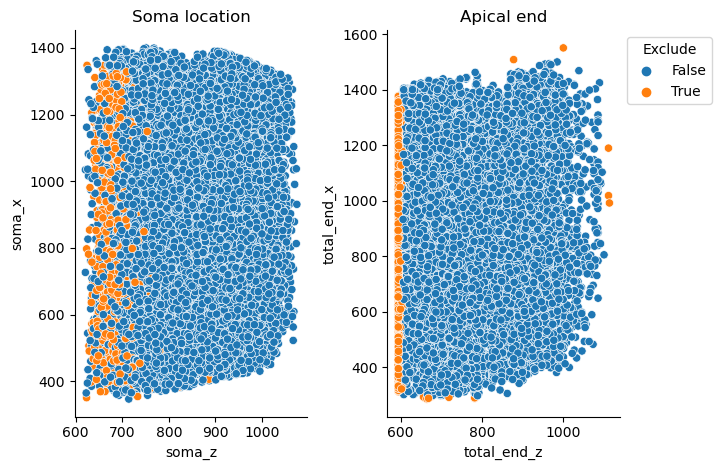

In [28]:
fig, ax = plt.subplots(1, 2)

sns.scatterplot(
    data=df_l6, x='soma_z', y='soma_x', ax=ax[0], legend=False, hue='exclude'
)
sns.scatterplot(
    data=df_l6, x='total_end_z', y='total_end_x', ax=ax[1], legend=True, hue='exclude'
)

ax[0].set_title('Soma location')
ax[1].set_title('Apical end')

sns.despine()
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 1), title='Exclude')